In [56]:
import pandas as pd
import seaborn as sns
df = sns.load_dataset('titanic')
pd.set_option('display.max_columns',15)
df.shape


import pandas as pd
import seaborn as sns
df = sns.load_dataset('titanic')
#df.info()
df.isnull().sum()
# deck의 결측치는 전체 891개 중 688개 이므로 삭제
# embark 와 embark_town은 같은 데이터 이므로 삭제
rdf = df.drop(['deck','embark_town'],axis = 1)
rdf.columns.values
# age의 결측치 177개  행 삭제
rdf = rdf.dropna( subset=['age'], how='any',axis=0)
len(rdf)


#3.1 머신러닝 학습에 필요한 컬럼을 선택(feature selection)
ndf = rdf[[ 'survived','pclass','sex','age','sibsp','parch','embarked']]
ndf.head()
# sex, embarked를 제외하고 숫자
#3.2 범주형 데이터를 숫자로 변한(onehot encoding)
gender = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf,gender], axis = 1)
onehot_embarked = pd.get_dummies(ndf['embarked'],prefix = 'town')
# 설명 : prefic=town이라고 해야 컬럼안의 도시명으로 컬럼명이 만들어짐
ndf = pd.concat([ndf,onehot_embarked],axis=1 )
ndf
# 3.3 범주형 컬럼 drop
ndf.drop(['sex','embarked'], axis = 1, inplace=True)
ndf


# 독립변수와 종속변수로 분리한다.
x = ndf[['pclass','age','sibsp','parch','female','male','town_C','town_Q','town_S']]
y = ndf['survived']
#표준화
from sklearn import preprocessing

x = preprocessing.StandardScaler().fit(x).transform(x)
x



from sklearn.model_selection import train_test_split
# 훈련 7 : 테스트 3 으로 나누고 시드 값 10
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state=5)


# from sklearn.neighbors import KNeighborsClassifier
# knn=KNeighborsClassifier(n_neighbors=5)
# knn.fit(x_train, y_train)


# y_hat = knn.predict(x_test)


# from sklearn import metrics

# knn_matrix = metrics.confusion_matrix(y_test, y_hat)
# knn_matrix

# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test, y_hat)
# print(accuracy)

for j in range(1, 21):

    from sklearn.neighbors import KNeighborsClassifier as kc

    knn = kc(n_neighbors=j)  # 모델을 생성한다.

    knn.fit(x_train, y_train)  # 훈련시킨다

    #테스트 데이터로 예측

    y_hat = knn.predict(x_test)

    #모형의 예측능력을 평가

    from sklearn import metrics

    knn_matrix = metrics.confusion_matrix(y_test, y_hat)

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_hat).ravel()

    #print('이원교차표:\n',knn_matrix,'\n')

    #정확도 측정

    from sklearn.metrics import accuracy_score

    accuracy = round(accuracy_score(y_test, y_hat) * 100, 2)

    print('k값:', j, '의 정확도:', accuracy, '% FN:', fn)

k값: 1 의 정확도: 72.09 % FN: 23
k값: 2 의 정확도: 77.21 % FN: 33
k값: 3 의 정확도: 80.47 % FN: 20
k값: 4 의 정확도: 78.6 % FN: 30
k값: 5 의 정확도: 78.6 % FN: 22
k값: 6 의 정확도: 80.0 % FN: 28
k값: 7 의 정확도: 80.0 % FN: 26
k값: 8 의 정확도: 79.53 % FN: 32
k값: 9 의 정확도: 78.6 % FN: 32
k값: 10 의 정확도: 79.53 % FN: 32
k값: 11 의 정확도: 79.07 % FN: 30
k값: 12 의 정확도: 78.6 % FN: 31
k값: 13 의 정확도: 75.81 % FN: 30
k값: 14 의 정확도: 76.28 % FN: 31
k값: 15 의 정확도: 76.74 % FN: 29
k값: 16 의 정확도: 77.67 % FN: 30
k값: 17 의 정확도: 77.21 % FN: 30
k값: 18 의 정확도: 77.67 % FN: 31
k값: 19 의 정확도: 77.21 % FN: 31
k값: 20 의 정확도: 76.74 % FN: 33


In [69]:





import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns',15)
df = sns.load_dataset('titanic')
#df.info()
df.isnull().sum()
# deck의 결측치는 전체 891개 중 688개 이므로 삭제
# embark 와 embark_town은 같은 데이터 이므로 삭제
rdf = df.drop(['deck','embark_town'],axis = 1)
rdf.columns.values
# age의 결측치 177개  행 삭제
#rdf = rdf.dropna( subset=['age'], how='any',axis=0)
most_freq = rdf['age'].value_counts(dropna=True).idxmax()

rdf.age.fillna(most_freq, inplace=True)
len(rdf)


#3.1 머신러닝 학습에 필요한 컬럼을 선택(feature selection)
ndf = rdf[[ 'survived','pclass','sex','age','sibsp','parch','embarked']]
ndf.head()
# sex, embarked를 제외하고 숫자
#3.2 범주형 데이터를 숫자로 변한(onehot encoding)
gender = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf,gender], axis = 1)
onehot_embarked = pd.get_dummies(ndf['embarked'],prefix = 'town')
# 설명 : prefic=town이라고 해야 컬럼안의 도시명으로 컬럼명이 만들어짐
ndf = pd.concat([ndf,onehot_embarked],axis=1 )
ndf
# 3.3 범주형 컬럼 drop
ndf.drop(['sex','embarked'], axis = 1, inplace=True)
ndf


# 독립변수와 종속변수로 분리한다.
x = ndf[['pclass','age','sibsp','parch','female','male','town_C','town_Q','town_S']]
y = ndf[['survived']]
#표준화
from sklearn import preprocessing

x = preprocessing.StandardScaler().fit(x).transform(x)
x



from sklearn.model_selection import train_test_split
# 훈련 7 : 테스트 3 으로 나누고 시드 값 10
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state=10)


from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)


y_hat = knn.predict(x_test)


from sklearn import metrics

knn_matrix = metrics.confusion_matrix(y_test, y_hat)
knn_matrix

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_hat)
print(accuracy)

# result = metrics.confusion_matrix(y_true, y_pred)
# tn,fp,fn,tp = metrics.confusion_matrix(y_true, y_hat).ravel()

f1_report = metrics.classification_report( y_true, y_hat)
print(f1_report)


0.8246268656716418


C:\Users\knit\anaconda3\lib\site-packages\ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


ValueError: Found input variables with inconsistent numbers of samples: [4, 268]

In [5]:
tit = pd.read_csv('d:\\data\\csv\\train.csv')
tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
wbcd = pd.read_csv('d:\\data\\csv\\wisc_bc_datacn.csv')
wbcd.isna().sum()
wbcd.info()
wbcd

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,...,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,...,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,...,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,...,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,...,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,...,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,...,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,...,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,...,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [66]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns',15)
#df = sns.load_dataset('titanic')
df = pd.read_csv('d:\\data\\csv\\wisc_bc_datacn.csv')
#df.info()
df.isnull().sum()
# deck의 결측치는 전체 891개 중 688개 이므로 삭제
# embark 와 embark_town은 같은 데이터 이므로 삭제
#rdf = df.drop(['id'],axis = 1)
rdf.columns.values
# age의 결측치 177개  행 삭제
#rdf = rdf.dropna( subset=['age'], how='any',axis=0)
#most_freq = rdf['age'].value_counts(dropna=True).idxmax()

#rdf.age.fillna(most_freq, inplace=True)
#len(rdf)


#3.1 머신러닝 학습에 필요한 컬럼을 선택(feature selection)
ndf = rdf#[[ 'survived','pclass','sex','age','sibsp','parch','embarked']]
ndf.head()
# sex, embarked를 제외하고 숫자
#3.2 범주형 데이터를 숫자로 변한(onehot encoding)
dia = pd.get_dummies(ndf['diagnosis'],prefix = 'diagnosis')
ndf = pd.concat([ndf,dia], axis = 1)
#onehot_embarked = pd.get_dummies(ndf['embarked'],prefix = 'town')
# 설명 : prefic=town이라고 해야 컬럼안의 도시명으로 컬럼명이 만들어짐
#ndf = pd.concat([ndf,onehot_embarked],axis=1 )
#ndf
# 3.3 범주형 컬럼 drop
ndf.drop(['diagnosis','diagnosis_B'], axis = 1, inplace=True)
ndf


# 독립변수와 종속변수로 분리한다.
x = ndf[ndf.columns.difference(['diagnosis_M'])]
#x2 = ndf.iloc[:,:-1]
y = ndf['diagnosis_M']
#표준화
from sklearn import preprocessing

x = preprocessing.StandardScaler().fit(x).transform(x)
x



from sklearn.model_selection import train_test_split
# 훈련 7 : 테스트 3 으로 나누고 시드 값 10
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state=5)


import matplotlib.pyplot as plt
error=[]


from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)


y_hat = knn.predict(x_test)


from sklearn import metrics

knn_matrix = metrics.confusion_matrix(y_test, y_hat)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_hat).ravel()
print(knn_matrix)
print(tn,fp,fn,tp)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_hat)
print(accuracy)
    
# plt.figure(figsize=(12,6))
# plt.plot(range(1,40), error, color='red', linestyle = 'dashed', marker = 'o',
#         markerfacecolor = 'blue', markersize = 10)
# plt,title = ('Error Rate K Value')
# plt.xlabel('K Value')
# plt.ylabel('Mean Error')

# #print(i)
# result = metrics.confusion_matrix(y_true, y_pred)
# tn,fp,fn,tp = metrics.confusion_matrix(y_true, y_pred).ravel()

# f1_report = metrics.classification_report( y_true, y_hat)
# print(f1_report)


KeyError: 'diagnosis'

In [28]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns',15)
#df = sns.load_dataset('titanic')
df = pd.read_csv('d:\\data\\csv\\wisc_bc_datacn.csv')
#df.info()
df.isnull().sum()
# deck의 결측치는 전체 891개 중 688개 이므로 삭제
# embark 와 embark_town은 같은 데이터 이므로 삭제
#rdf = df.drop(['id'],axis = 1)
rdf.columns.values
# age의 결측치 177개  행 삭제
#rdf = rdf.dropna( subset=['age'], how='any',axis=0)
#most_freq = rdf['age'].value_counts(dropna=True).idxmax()

#rdf.age.fillna(most_freq, inplace=True)
#len(rdf)


#3.1 머신러닝 학습에 필요한 컬럼을 선택(feature selection)
ndf = rdf#[[ 'survived','pclass','sex','age','sibsp','parch','embarked']]
ndf.head()
# sex, embarked를 제외하고 숫자
#3.2 범주형 데이터를 숫자로 변한(onehot encoding)
dia = pd.get_dummies(ndf['diagnosis'],prefix = 'diagnosis')
ndf = pd.concat([ndf,dia], axis = 1)
#onehot_embarked = pd.get_dummies(ndf['embarked'],prefix = 'town')
# 설명 : prefic=town이라고 해야 컬럼안의 도시명으로 컬럼명이 만들어짐
#ndf = pd.concat([ndf,onehot_embarked],axis=1 )
#ndf
# 3.3 범주형 컬럼 drop
ndf.drop(['diagnosis','diagnosis_B'], axis = 1, inplace=True)
ndf


# 독립변수와 종속변수로 분리한다.
#x = ndf[ndf.columns.difference(['diagnosis_M'])]
x = ndf.iloc[:,:-1]
y = ndf['diagnosis_M']
#표준화
from sklearn import preprocessing

x = preprocessing.StandardScaler().fit(x).transform(x)
x



from sklearn.model_selection import train_test_split
# 훈련 7 : 테스트 3 으로 나누고 시드 값 10
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state=10)
print(y_test.values)

[1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1
 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1
 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1
 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1]


In [29]:
import numpy as np
import matplotlib.pyplot as plt
error=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i=knn.predict(x_test)
    print(y_test)

172    1
553    0
374    0
370    0
419    1
      ..
108    0
458    0
173    0
240    1
436    1
Name: diagnosis_M, Length: 171, dtype: uint8
172    1
553    0
374    0
370    0
419    1
      ..
108    0
458    0
173    0
240    1
436    1
Name: diagnosis_M, Length: 171, dtype: uint8
172    1
553    0
374    0
370    0
419    1
      ..
108    0
458    0
173    0
240    1
436    1
Name: diagnosis_M, Length: 171, dtype: uint8
172    1
553    0
374    0
370    0
419    1
      ..
108    0
458    0
173    0
240    1
436    1
Name: diagnosis_M, Length: 171, dtype: uint8
172    1
553    0
374    0
370    0
419    1
      ..
108    0
458    0
173    0
240    1
436    1
Name: diagnosis_M, Length: 171, dtype: uint8
172    1
553    0
374    0
370    0
419    1
      ..
108    0
458    0
173    0
240    1
436    1
Name: diagnosis_M, Length: 171, dtype: uint8
172    1
553    0
374    0
370    0
419    1
      ..
108    0
458    0
173    0
240    1
436    1
Name: diagnosis_M, Length: 171, dtype

Text(0, 0.5, 'Mean Error')

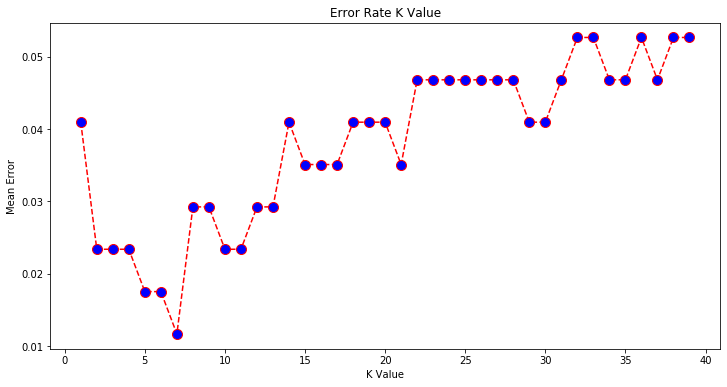

In [34]:
import numpy as np
import matplotlib.pyplot as plt
error=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i=knn.predict(x_test)
    error.append(np.mean(pred_i!=y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [18]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns',15)
#df = sns.load_dataset('titanic')
df = pd.read_csv('d:\\data\\csv\\wisc_bc_datacn.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,...,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,...,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,...,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,...,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,...,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,...,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,...,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,...,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,...,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [23]:
x2

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,...,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,...,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,...,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,...,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,...,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,...,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,...,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,...,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,...,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [ ]:
import seaborn as sb

import pandas as pd

import warnings  # warning 메세지 출력 무시하게 해주는 패키지

warnings.filterwarnings('ignore')  # warning 메세지 출력되지 않게 하는 코드

# 1. csv file ----> dataframe 생성

df = pd.read_csv('c:\\data\\wisc_bc_data.csv')

# 2. 결측치를 제거하거나 치환

#df.info() # 타이타닉 데이터 프레임의 자료형을 확인한다.

#df.shape

# 2-2. 결측치를 확인한다.

pd.set_option('display.max_rows', 100)  # 컬럼을 다 확인하기 위해 보여주는것을 늘려주는 코드

df.isnull().sum()

# 2-3. id 컬럼 삭제

rdf = df.drop(['id'], axis=1)

# 3. knn 이므로 범주형 데이터를 숫자형으로 변환

diag = pd.get_dummies(rdf['diagnosis'], prefix='diagnosis')

rdf = pd.concat([rdf, diag], axis=1)

# 3-3. 범주형 컬럼을 drop 한다.

rdf = rdf.drop(['diagnosis', 'diagnosis_B'], axis=1)

# 4. 표준화를 진행한다

# 독립변수와 종속변수로 분리한다.

x = rdf.drop(['diagnosis_M'], axis=1)

y = rdf['diagnosis_M']

# 표준화를 한다.

from sklearn import preprocessing

x = preprocessing.StandardScaler().fit(x).transform(x)

# 5. 데이터를 훈련 데이터/테스트 데이터로 나눈다. 훈련7, 테스트 3 으로 나눈다.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=5)

for j in range(1, 21):

    from sklearn.neighbors import KNeighborsClassifier as kc

    knn = kc(n_neighbors=j)  # 모델을 생성한다.

    knn.fit(x_train, y_train)  # 훈련시킨다

    #테스트 데이터로 예측

    y_hat = knn.predict(x_test)

    #모형의 예측능력을 평가

    from sklearn import metrics

    knn_matrix = metrics.confusion_matrix(y_test, y_hat)

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_hat).ravel()

    #print('이원교차표:\n',knn_matrix,'\n')

    #정확도 측정

    from sklearn.metrics import accuracy_score

    accuracy = round(accuracy_score(y_test, y_hat) * 100, 2)

    print('k값:', j, '의 정확도:', accuracy, '% FN:', fn)

In [60]:
from sklearn import metrics
y_true = [0,1,0,1] # 실제값/ 0은 사망자/ 1은 생존자
y_pred = [1,1,1,0] # 예측값/ 0은 사망자/ 1은 생존자
result = metrics.confusion_matrix(y_true, y_pred)
tn,fp,fn,tp = metrics.confusion_matrix(y_true, y_pred).ravel()

f1_report = metrics.classification_report( y_true, y_pred)
print(f1_report)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.50      0.40         2

    accuracy                           0.25         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.17      0.25      0.20         4



In [63]:
import pandas as pd
import seaborn as sns
df = sns.load_dataset('titanic')
pd.set_option('display.max_columns',15)
df.shape


import pandas as pd
import seaborn as sns
df = sns.load_dataset('titanic')
#df.info()
df.isnull().sum()
# deck의 결측치는 전체 891개 중 688개 이므로 삭제
# embark 와 embark_town은 같은 데이터 이므로 삭제
rdf = df.drop(['deck','embark_town'],axis = 1)
rdf.columns.values
# age의 결측치 177개  행 삭제
rdf = rdf.dropna( subset=['age'], how='any',axis=0)
len(rdf)


#3.1 머신러닝 학습에 필요한 컬럼을 선택(feature selection)
ndf = rdf[[ 'survived','pclass','sex','age','sibsp','parch','embarked']]
ndf.head()
# sex, embarked를 제외하고 숫자
#3.2 범주형 데이터를 숫자로 변한(onehot encoding)
gender = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf,gender], axis = 1)
onehot_embarked = pd.get_dummies(ndf['embarked'],prefix = 'town')
# 설명 : prefic=town이라고 해야 컬럼안의 도시명으로 컬럼명이 만들어짐
ndf = pd.concat([ndf,onehot_embarked],axis=1 )
ndf
# 3.3 범주형 컬럼 drop
ndf.drop(['sex','embarked'], axis = 1, inplace=True)
ndf


# 독립변수와 종속변수로 분리한다.
x = ndf[['pclass','age','sibsp','parch','female','male','town_C','town_Q','town_S']]
y = ndf['survived']
#표준화
from sklearn import preprocessing

x = preprocessing.StandardScaler().fit(x).transform(x)
x



from sklearn.model_selection import train_test_split
# 훈련 7 : 테스트 3 으로 나누고 시드 값 10
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state=5)


from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)


y_hat = knn.predict(x_test)


from sklearn import metrics

knn_matrix = metrics.confusion_matrix(y_test, y_hat)
knn_matrix

#result = metrics.confusion_matrix(y_true, y_hat)
tn,fp,fn,tp = metrics.confusion_matrix(y_true, y_hat).ravel()

f1_report = metrics.classification_report( y_true, y_hat)
print(f1_report)


# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test, y_hat)
# print(accuracy)

# for j in range(1, 21):

#     from sklearn.neighbors import KNeighborsClassifier as kc

#     knn = kc(n_neighbors=j)  # 모델을 생성한다.

#     knn.fit(x_train, y_train)  # 훈련시킨다

#     #테스트 데이터로 예측

#     y_hat = knn.predict(x_test)

#     #모형의 예측능력을 평가

#     from sklearn import metrics

#     knn_matrix = metrics.confusion_matrix(y_test, y_hat)

#     tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_hat).ravel()

#     #print('이원교차표:\n',knn_matrix,'\n')

#     #정확도 측정

#     from sklearn.metrics import accuracy_score

#     accuracy = round(accuracy_score(y_test, y_hat) * 100, 2)

#     print('k값:', j, '의 정확도:', accuracy, '% FN:', fn)

ValueError: Found input variables with inconsistent numbers of samples: [4, 215]